##Python imports

In [1]:
import scipy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.spatial import ConvexHull
import scipy.optimize

from IPython.html.widgets import interact, interactive, fixed, Checkbox
from IPython.display import display

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


C:\Users\David\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: divide by zero encountered in divide


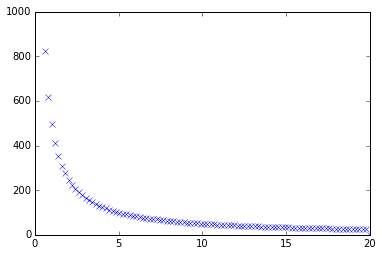

In [2]:
Cf = [20.0, 1e-6];
k = 0.002;

def cstr_fn(x):
    ti = x/(k*(1-x)*(Cf[1] + Cf[0]*x))
    
    return ti

def rate_fn(C,t):
    cA = C[0]
    cB = Cf[1] + Cf[0]*(1.0 - cA/Cf[0])
    
    #rA = -k*cA*cB
    rA = -k*cA*cB
    
    return sp.array([rA,1.0])

x_range = sp.linspace(0,1,100)
cA_range = Cf[0]*(1.0 - x_range)
cB_range = Cf[1] + Cf[0]*x_range

cstr_ts = cstr_fn(x_range)

plt.figure()

plt.plot(cA_range,cstr_ts, "bx")

plt.axis([0,Cf[0],0,1000])
plt.show()

Illegal input detected (internal error).
Run with full_output = 1 to get quantitative information.


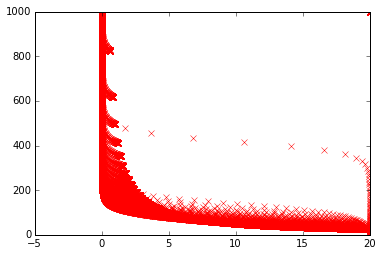

In [41]:
cstr_cs = sp.array([cA_range,cstr_ts]).T

plt.figure()
plt.hold(True)

for ci in cstr_cs:
        
    #integrate PFR from CSTR locus and only keep concentrations lower than 1000 s residence time
    pfr_ts = sp.logspace(-3,3,300)
    pfr_cs = odeint(rate_fn, ci, pfr_ts)
    
    all_cs = sp.vstack([cstr_cs,pfr_cs, [Cf[0], 1000.0]])
    
    kk = sp.nonzero(all_cs[:,1]<=1000.0)[0]
    valid_cs = all_cs[kk,:]

    plt.plot(valid_cs[:,0], valid_cs[:,1], "rx")
    
plt.show()

In [53]:
K = ConvexHull(valid_cs, qhull_options="FA")
K.volume

AttributeError: 'ConvexHull' object has no attribute 'volume'